In [1]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [2]:
gt=pd.read_csv('C:\\Users\\Akshay N R\\Desktop\\Data Science\\assignments\\neural networks\\gas_turbines.csv')
gt

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


# EDA,Featuring engineering and Data Visualisation for given dataset

In [3]:
GT=gt[['TEY','AT','AP','AH','AFDP','GTEP','TIT','TAT','CDP','CO','NOX']]
GT

,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,114.70,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,114.72,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,114.71,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,114.72,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,114.72,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,111.61,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,111.78,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,110.19,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,110.74,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [4]:
GT.isna().sum()

TEY     0
AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
CDP     0
CO      0
NOX     0
dtype: int64

In [5]:
GT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TEY     15039 non-null  float64
 1   AT      15039 non-null  float64
 2   AP      15039 non-null  float64
 3   AH      15039 non-null  float64
 4   AFDP    15039 non-null  float64
 5   GTEP    15039 non-null  float64
 6   TIT     15039 non-null  float64
 7   TAT     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [6]:
GT.describe()

,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
count,15039.000000,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,134.188464,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,12.102353,1.972499,68.190934
std,15.829717,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,1.103196,2.222206,10.470586
min,100.170000,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,9.904400,0.000388,27.765000
25%,127.985000,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,11.622000,0.858055,61.303500
50%,133.780000,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,12.025000,1.390200,66.601000
75%,140.895000,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,12.578000,2.160400,73.935500
max,174.610000,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,15.081000,44.103000,119.890000


In [7]:
GT[GT.duplicated()].shape

(0, 11)

In [8]:
GT.corr()

,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
TEY,1.000000,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,0.988473,-0.541751,-0.102631
AT,-0.207495,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.100705,-0.088588,-0.600006
AP,0.146939,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.131198,0.041614,0.256744
AH,-0.110272,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.182010,0.165505,0.143061
AFDP,0.717995,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.727152,-0.334207,-0.037299
GTEP,0.977042,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.993784,-0.508259,-0.208496
TIT,0.891587,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.887238,-0.688272,-0.231636
TAT,-0.720356,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.744740,0.063404,0.009888
CDP,0.988473,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,1.000000,-0.520783,-0.169103
CO,-0.541751,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.520783,1.000000,0.316743


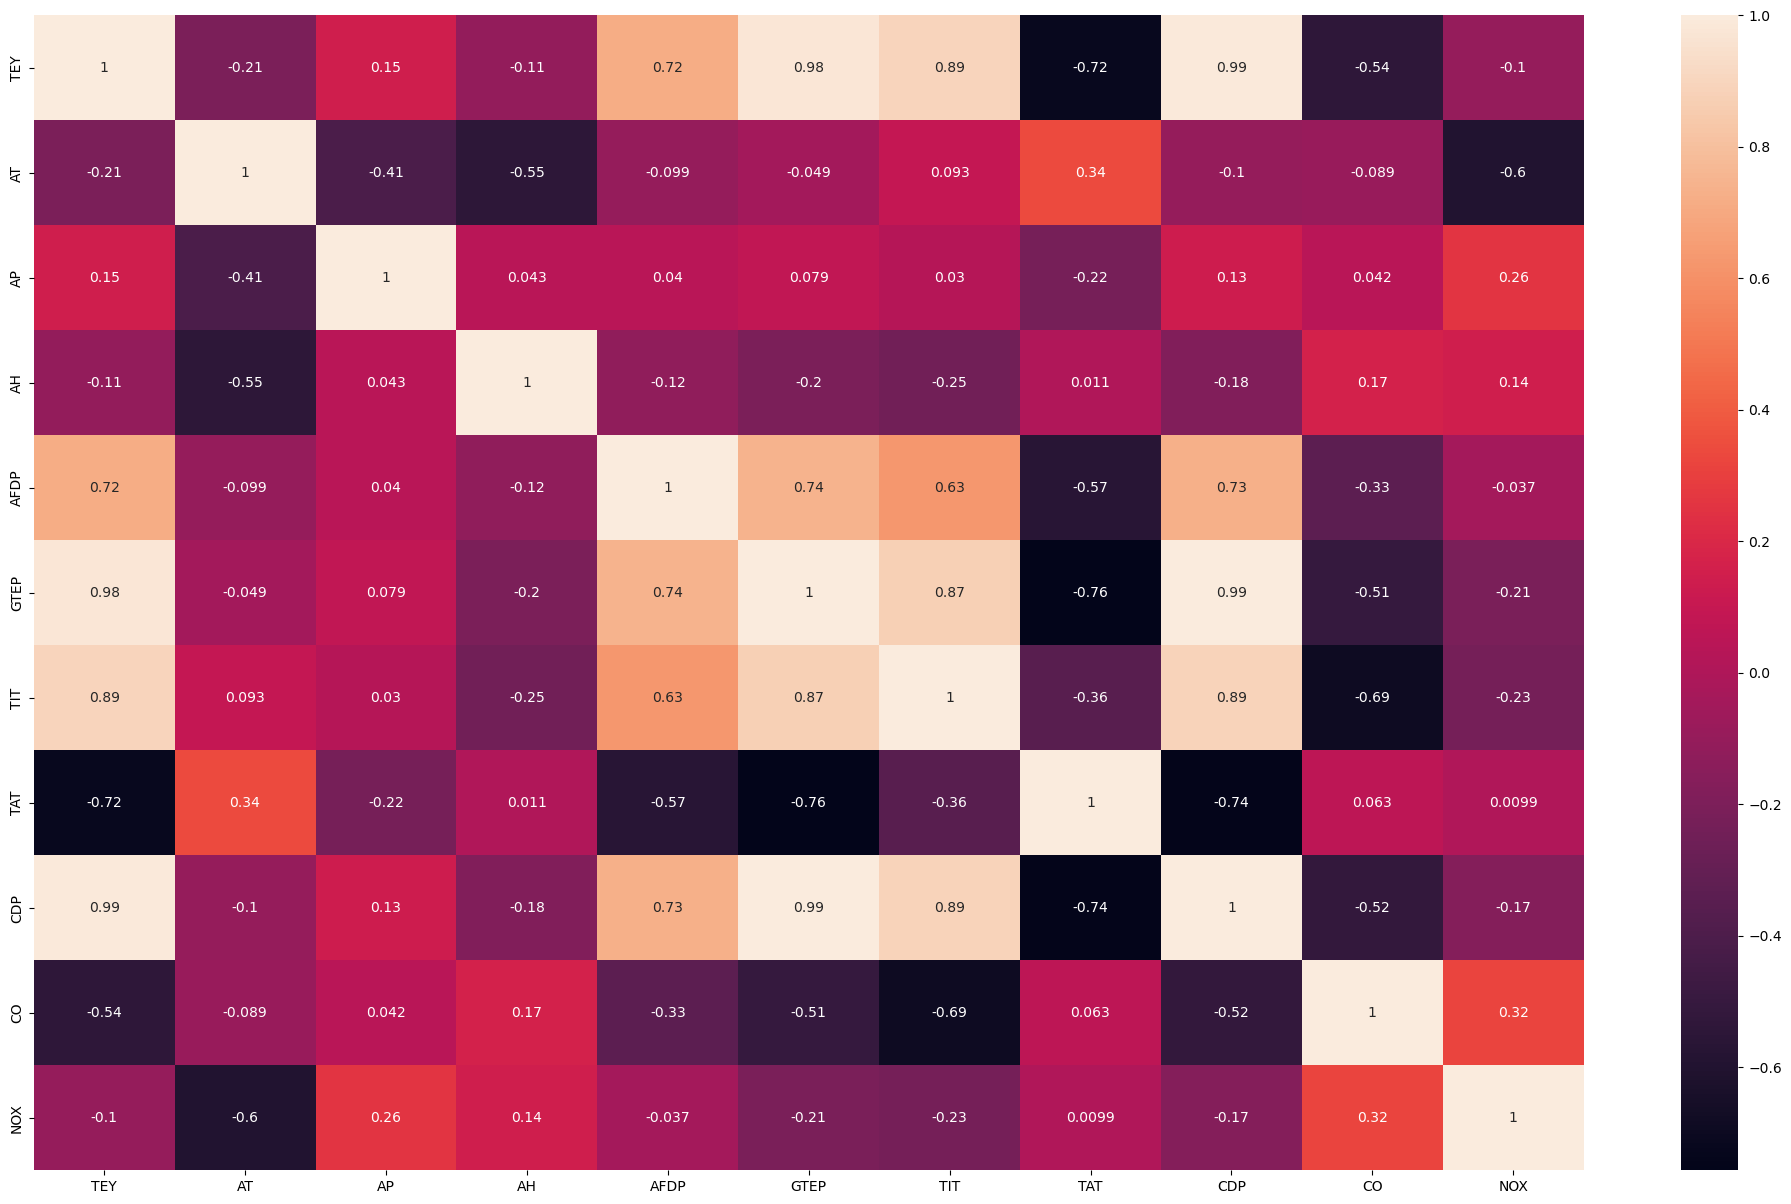

In [9]:
plt.figure(figsize = (25,15))
sns.heatmap(GT.corr(),annot=True);

In [10]:
#since CDP and GTEP are highly correlated we drop CDP
GT1=GT.drop(['CDP'],axis=1)

In [11]:
GT1

,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CO,NOX
0,114.70,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,3.1547,82.722
1,114.72,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,3.2363,82.776
2,114.71,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,3.2012,82.468
3,114.72,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,3.1923,82.670
4,114.72,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,111.61,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,4.5186,79.559
15035,111.78,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,4.8470,79.917
15036,110.19,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,7.9632,90.912
15037,110.74,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,6.2494,93.227


In [12]:
scaler=StandardScaler()

In [13]:
gtscaled=scaler.fit_transform(GT1)
gtscaled

array([[-1.23117246, -1.4397781 , -0.82664395, ...,  0.58524028,
         0.53201195,  1.3878449 ],
       [-1.22990897, -1.44960109, -0.74864748, ...,  0.58524028,
         0.56873344,  1.39300237],
       [-1.23054071, -1.43472138, -0.68625031, ...,  0.56871459,
         0.5529378 ,  1.36358566],
       ...,
       [-1.5160891 , -1.38626659, -1.07623263, ..., -1.02664984,
         2.69592467,  2.17006209],
       [-1.48134317, -1.42042259, -0.99823616, ..., -0.52833681,
         1.9246834 ,  2.391165  ],
       [-1.42827666, -1.43073409, -0.93583899, ...,  0.05768949,
         1.35415028,  2.32153907]])

In [14]:
stdGT=pd.DataFrame(gtscaled,columns=GT1.columns[0:])
stdGT

,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CO,NOX
0,-1.231172,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,0.532012,1.387845
1,-1.229909,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,0.568733,1.393002
2,-1.230541,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,0.552938,1.363586
3,-1.229909,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,0.548933,1.382878
4,-1.229909,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,0.574179,1.348591
...,...,...,...,...,...,...,...,...,...,...
15034,-1.426381,-1.153182,-1.185428,1.401860,-0.865850,-1.498657,-2.063184,0.103453,1.145792,1.085751
15035,-1.415642,-1.303986,-1.138630,1.447753,-0.913470,-1.438759,-2.268905,-0.276638,1.293578,1.119943
15036,-1.516089,-1.386267,-1.076233,1.476971,-0.951488,-1.410967,-2.789257,-1.026650,2.695925,2.170062
15037,-1.481343,-1.420423,-0.998236,1.441590,-0.988848,-1.447624,-2.456474,-0.528337,1.924683,2.391165


In [15]:
x=stdGT.iloc[:,1:]
y=stdGT.iloc[:,0]

In [16]:
y

0       -1.231172
1       -1.229909
2       -1.230541
3       -1.229909
4       -1.229909
           ...   
15034   -1.426381
15035   -1.415642
15036   -1.516089
15037   -1.481343
15038   -1.428277
Name: TEY, Length: 15039, dtype: float64

In [17]:
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CO,NOX
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,0.574179,1.348591
...,...,...,...,...,...,...,...,...,...
15034,-1.153182,-1.185428,1.401860,-0.865850,-1.498657,-2.063184,0.103453,1.145792,1.085751
15035,-1.303986,-1.138630,1.447753,-0.913470,-1.438759,-2.268905,-0.276638,1.293578,1.119943
15036,-1.386267,-1.076233,1.476971,-0.951488,-1.410967,-2.789257,-1.026650,2.695925,2.170062
15037,-1.420423,-0.998236,1.441590,-0.988848,-1.447624,-2.456474,-0.528337,1.924683,2.391165


<AxesSubplot:xlabel='TAT', ylabel='Density'>

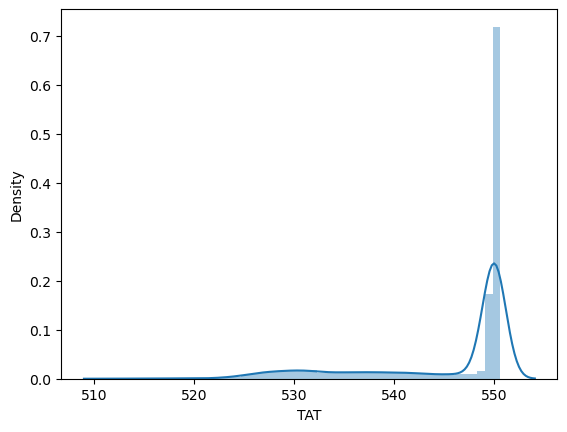

In [18]:
sns.distplot(GT.TAT)

<AxesSubplot:xlabel='AT', ylabel='Density'>

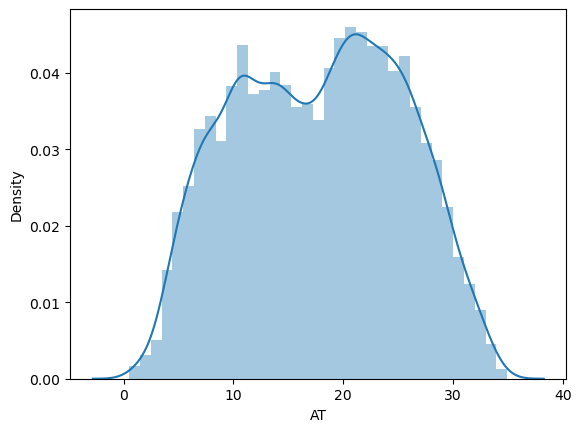

In [19]:
sns.distplot(GT.AT)

<AxesSubplot:xlabel='AP', ylabel='Density'>

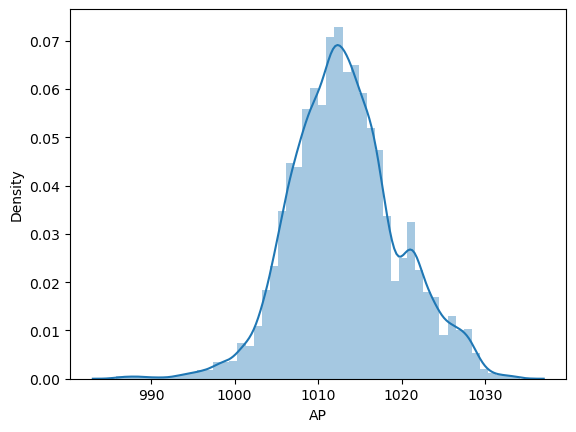

In [20]:
sns.distplot(GT.AP)

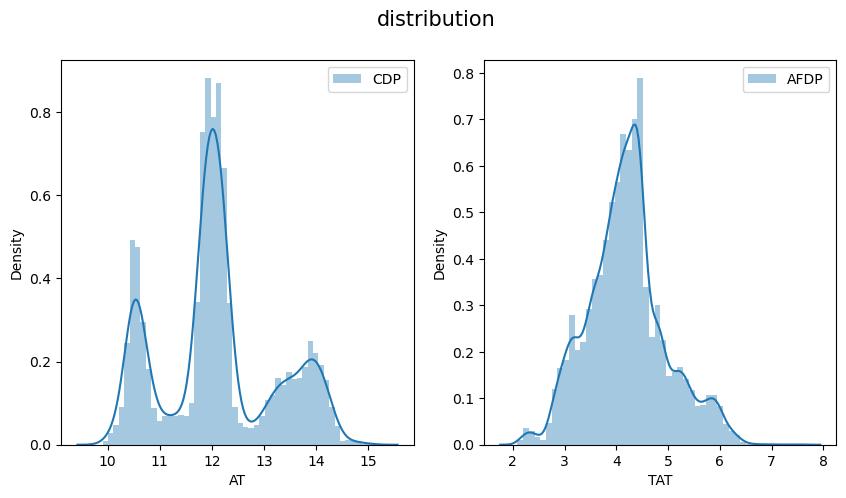

In [21]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.suptitle('distribution',fontsize=15)

sns.distplot(GT.CDP,label='CDP')
plt.xlabel('AT')
plt.ylabel('Density')
plt.legend()

plt.subplot(1,2,2)
sns.distplot(GT.AFDP,label='AFDP')
plt.xlabel('TAT')
plt.ylabel('Density')
plt.legend();

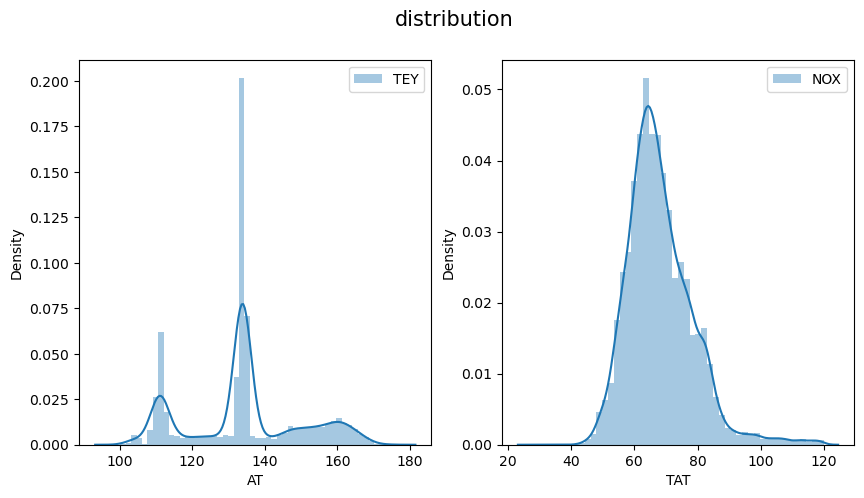

In [22]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.suptitle('distribution',fontsize=15)

sns.distplot(GT.TEY,label='TEY')
plt.xlabel('AT')
plt.ylabel('Density')
plt.legend()

plt.subplot(1,2,2)
sns.distplot(GT.NOX,label='NOX')
plt.xlabel('TAT')
plt.ylabel('Density')
plt.legend();

# Creating Model

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [30]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=9, activation='tanh'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [31]:
import keras
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import InputLayer,Dense
estimator = KerasRegressor(build_fn=create_model, nb_epoch=50, batch_size=100, verbose=False)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, x, y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))


Results: -0.19 (0.08) MSE


In [32]:
estimator.fit(x, y)

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [36]:
pred= estimator.predict(x)
pred

array([-1.3874304, -1.393588 , -1.3855617, ..., -1.5061244, -1.4699675,
       -1.4592642], dtype=float32)

In [37]:
import tensorflow as tf
input_size = 9
output_size = 1
hidden_layer_size = 50

model = tf.keras.Sequential([
                                
                               tf.keras.layers.Dense(hidden_layer_size, input_dim = input_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(output_size)
                             ])

In [38]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.03)
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MeanSquaredError'])

In [39]:
model.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_82 (Dense)            (None, 50)                500       
                                                                 
 dense_83 (Dense)            (None, 50)                2550      
                                                                 
 dense_84 (Dense)            (None, 50)                2550      
                                                                 
 dense_85 (Dense)            (None, 1)                 51        
                                                                 
Total params: 5,651
Trainable params: 5,651
Non-trainable params: 0
_________________________________________________________________


# Splitting the data into train and test

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=40)

# Building Final Model

In [43]:
Final=model.fit(X_train,Y_train,validation_split=0.3,epochs=70,batch_size=200)

Epoch 1/70
37/37 [==============================] - 5s 26ms/step - loss: 0.5461 - mean_squared_error: 0.5461 - val_loss: 0.0906 - val_mean_squared_error: 0.0906
Epoch 2/70
37/37 [==============================] - 0s 9ms/step - loss: 0.0379 - mean_squared_error: 0.0379 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 3/70
37/37 [==============================] - 0s 9ms/step - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 4/70
37/37 [==============================] - 0s 9ms/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 5/70
37/37 [==============================] - 0s 9ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0062 - val_mean_squared_error: 0.0062
Epoch 6/70
37/37 [==============================] - 0s 9ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 7/70
37/37 [=====================

Epoch 52/70
37/37 [==============================] - 0s 10ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 53/70
37/37 [==============================] - 0s 10ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 54/70
37/37 [==============================] - 0s 9ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 55/70
37/37 [==============================] - 0s 9ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 56/70
37/37 [==============================] - 0s 9ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 57/70
37/37 [==============================] - 0s 9ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 58/70
37/37 [=============

pridiction on whole data

In [44]:
scores = model.evaluate(x, y)
print("%s: %.2f%%"  %(model.metrics_names[1], scores[1]))

470/470 [==============================] - 1s 3ms/step - loss: 0.0013 - mean_squared_error: 0.0013
mean_squared_error: 0.00%


In [45]:
model.history.history.keys()

dict_keys([])

In [47]:
Final.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

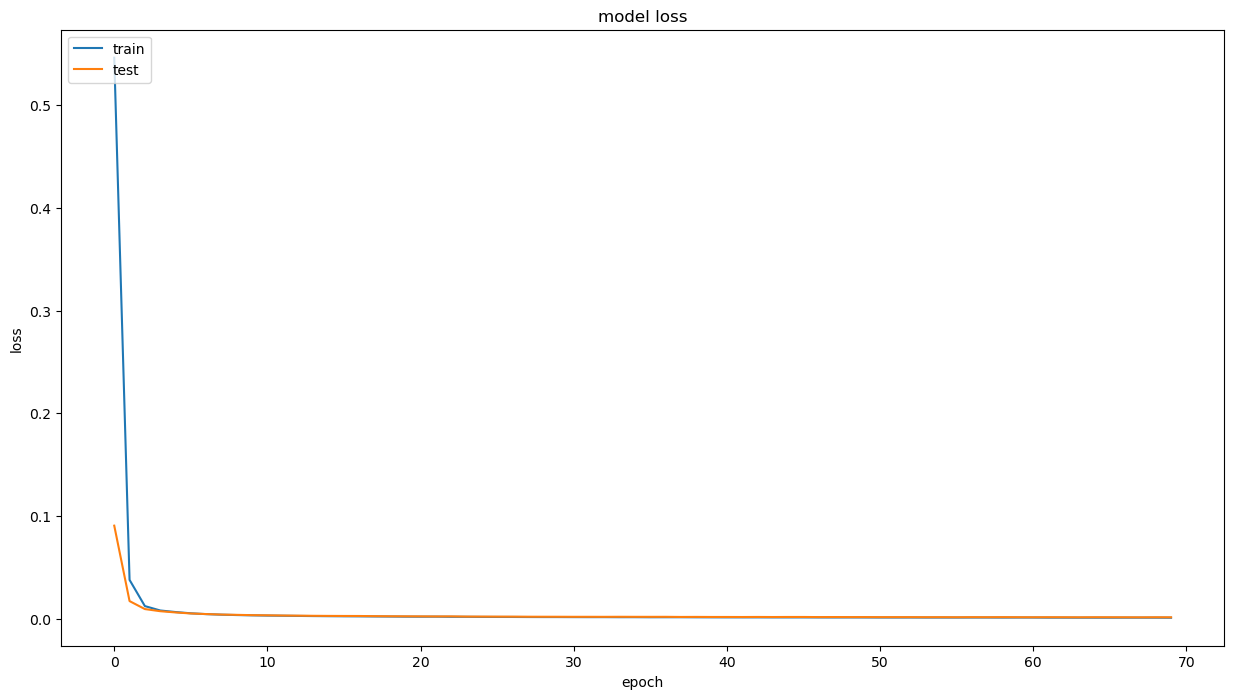

In [49]:
plt.figure(figsize=(15,8))
plt.plot(Final.history['loss'])
plt.plot(Final.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [51]:
prediction = model.predict(X_test)
print(prediction)

141/141 [==============================] - 1s 3ms/step
[[-0.0044207 ]
 [ 2.1400478 ]
 [-0.01667923]
 ...
 [-0.13331088]
 [ 0.03043729]
 [ 0.02279079]]


In [52]:
df = pd.DataFrame(prediction,columns=['TEY'])
df

,TEY
0,-0.004421
1,2.140048
2,-0.016679
3,0.762347
4,0.013353
...,...
4507,0.013396
4508,1.203171
4509,-0.133311
4510,0.030437


In [54]:
predictions_df = pd.DataFrame()
predictions_df['Actual'] = Y_test
predictions_df['Predicted'] = prediction
predictions_df['% Error'] = abs(predictions_df['Actual'] - predictions_df['Predicted'])/predictions_df['Actual']*100
predictions_df.reset_index(drop = True)

,Actual,Predicted,% Error
0,-0.025804,-0.004421,-82.868486
1,2.111386,2.140048,1.357476
2,-0.022014,-0.016679,-24.233585
3,0.812520,0.762347,6.174957
4,-0.011274,0.013353,-218.436744
...,...,...,...
4507,-0.001798,0.013396,-844.975666
4508,1.206097,1.203171,0.242600
4509,-0.119303,-0.133311,-11.741789
4510,0.042424,0.030437,28.254378


# Above model is applied on std data


# Lets apply it on given data

In [55]:
GT1

,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CO,NOX
0,114.70,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,3.1547,82.722
1,114.72,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,3.2363,82.776
2,114.71,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,3.2012,82.468
3,114.72,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,3.1923,82.670
4,114.72,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,111.61,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,4.5186,79.559
15035,111.78,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,4.8470,79.917
15036,110.19,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,7.9632,90.912
15037,110.74,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,6.2494,93.227


In [56]:
X=GT1.iloc[:,1:]
Y=GT1.iloc[:,0]

In [57]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=40)

In [58]:
FinalModel=model.fit(x_train,y_train,validation_split=0.3,epochs=70,batch_size=200)

Epoch 1/70
37/37 [==============================] - 0s 11ms/step - loss: 4769.4336 - mean_squared_error: 4769.4336 - val_loss: 285.4775 - val_mean_squared_error: 285.4776
Epoch 2/70
37/37 [==============================] - 0s 7ms/step - loss: 185.4147 - mean_squared_error: 185.4147 - val_loss: 162.5454 - val_mean_squared_error: 162.5454
Epoch 3/70
37/37 [==============================] - 0s 8ms/step - loss: 150.5047 - mean_squared_error: 150.5047 - val_loss: 147.2460 - val_mean_squared_error: 147.2460
Epoch 4/70
37/37 [==============================] - 0s 8ms/step - loss: 140.0085 - mean_squared_error: 140.0085 - val_loss: 138.2714 - val_mean_squared_error: 138.2714
Epoch 5/70
37/37 [==============================] - 0s 9ms/step - loss: 131.0215 - mean_squared_error: 131.0215 - val_loss: 130.2102 - val_mean_squared_error: 130.2102
Epoch 6/70
37/37 [==============================] - 0s 8ms/step - loss: 121.4544 - mean_squared_error: 121.4544 - val_loss: 119.0235 - val_mean_squared_error

In [59]:
Scores = model.evaluate(X, Y)
print("%s: %.2f%%"  %(model.metrics_names[1], scores[1]))

470/470 [==============================] - 2s 3ms/step - loss: 1.1424 - mean_squared_error: 1.1424
mean_squared_error: 0.00%


In [60]:
FinalModel.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

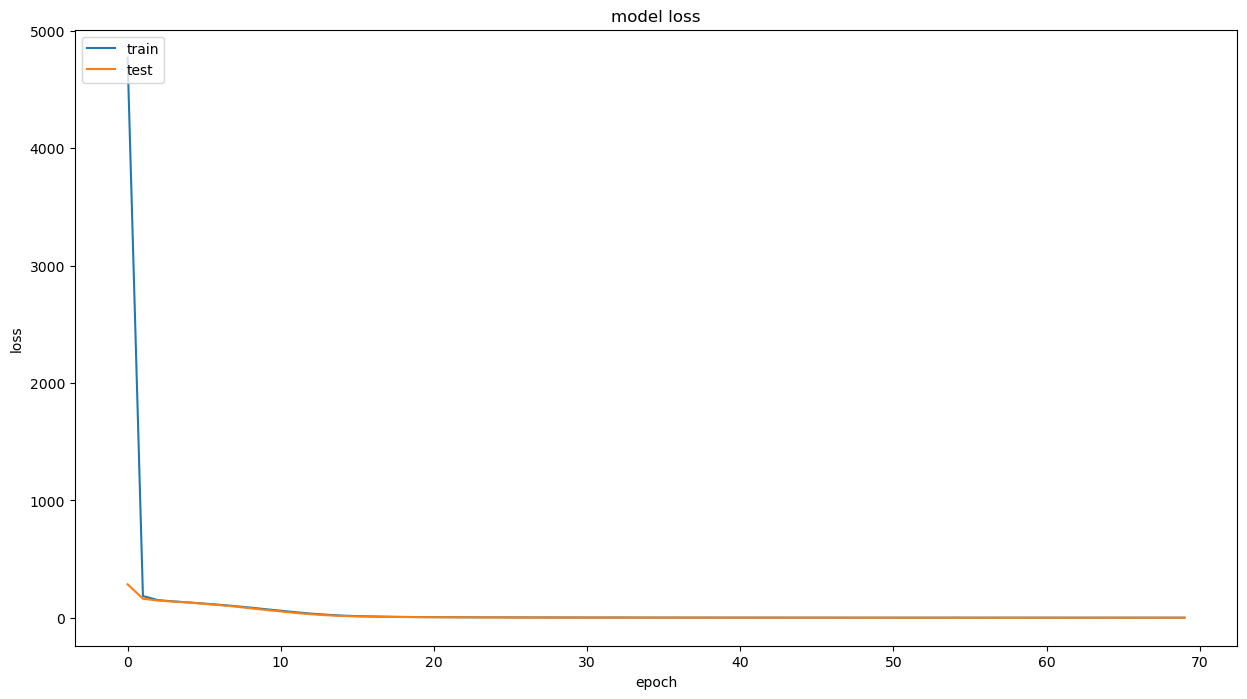

In [61]:
plt.figure(figsize=(15,8))
plt.plot(FinalModel.history['loss'])
plt.plot(FinalModel.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [63]:
predictions = model.predict(x_test)
print(predictions)

141/141 [==============================] - 0s 3ms/step
[[133.5436 ]
 [167.67227]
 [132.7061 ]
 ...
 [131.27837]
 [135.00331]
 [134.79637]]


In [64]:
DF = pd.DataFrame(predictions,columns=['TEY'])
DF

,TEY
0,133.543594
1,167.672272
2,132.706100
3,145.831024
4,134.564133
...,...
4507,134.636444
4508,153.914841
4509,131.278366
4510,135.003311


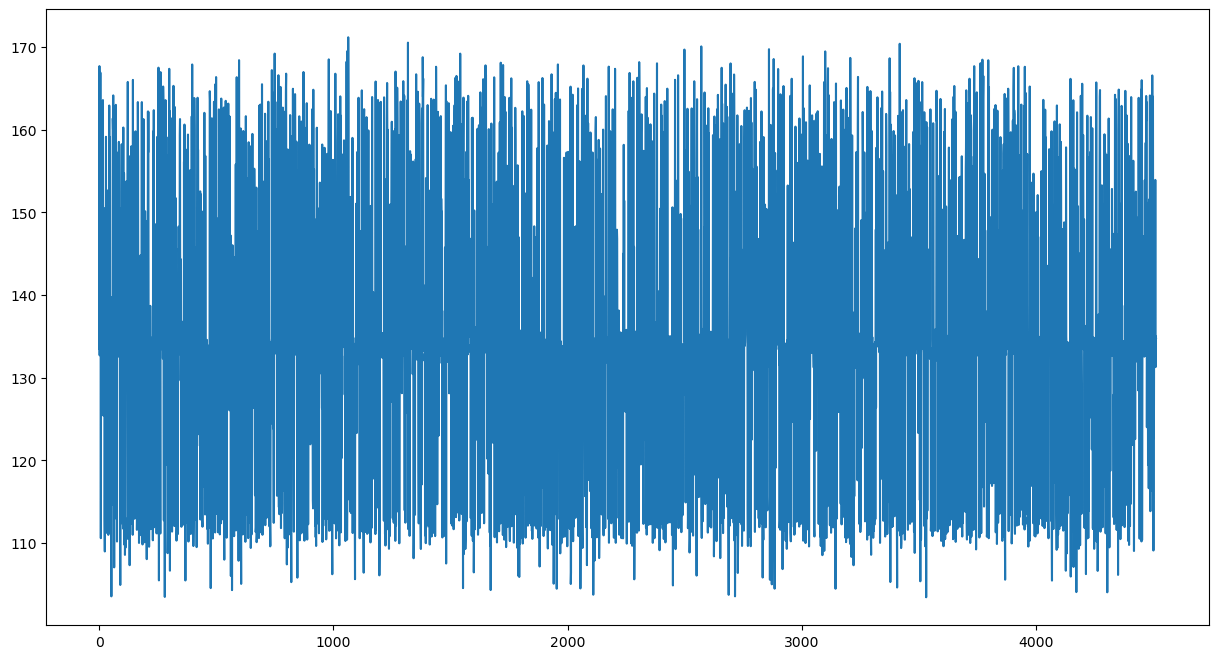

In [65]:
plt.figure(figsize=(15,8))
plt.plot(predictions)

In [66]:
Predictions_df = pd.DataFrame()
Predictions_df['Actual'] = y_test
Predictions_df['Predicted'] = predictions
Predictions_df['% Error'] = abs(Predictions_df['Actual'] - Predictions_df['Predicted'])/Predictions_df['Actual']*100
Predictions_df.reset_index(drop = True)

,Actual,Predicted,% Error
0,133.78,133.543594,0.176712
1,167.61,167.672272,0.037153
2,133.84,132.706100,0.847205
3,147.05,145.831024,0.828953
4,134.01,134.564133,0.413501
...,...,...,...
4507,134.16,134.636444,0.355131
4508,153.28,153.914841,0.414171
4509,132.30,131.278366,0.772210
4510,134.86,135.003311,0.106267


Here we can observe that our predicted value is almost accuracte as compared to Actual data with very less errors. Hence, we finally built a good model.